# **PROJECT 4: PREDICT ONLINE PURCHASE INTENT – CUSTOMER BEHAVIOUR MODELING using Machine learning**



## **GOAL**
The goal of this project is to develop a machine learning-based system that predicts whether a website visitor will make a purchase during their session. By analyzing browsing behavior and session attributes, the project aims to support decision-making in areas such as customer targeting, marketing strategy, and user experience optimization.

<br>

## **OBJECTIVE**
The objective is to preprocess and explore the online shoppers dataset, convert it into machine-learning-ready format, and build classification models including KNN, Logistic Regression, and Random Forest. The project also explores dimensionality reduction (PCA), class imbalance handling (SMOTE), and performance validation techniques (cross-validation). The end goal is to evaluate and compare model performance and select the most effective model for predicting purchase intent.





### Cell 1: Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

### Cell 2: Import Dataset and Frist Five rows of datadet

The dataset shows session-level user behavior on an e-commerce site. Many records have 0 values in fields like Administrative, Informational, and ProductRelated, indicating users didn't interact with those page types. Their corresponding durations are also 0, meaning no time was spent—likely bounced visits. The columns BounceRates and ExitRates help capture session quality. Categorical features like Month, VisitorType, and Revenue are in text or boolean format, and will require encoding before modeling. Most users in the initial sample are returning visitors from February.

In [ ]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Cell 4: It provides a brief summary of the dataset, showing the number of rows, columns, data types, and missing values

- The dataset contains 12,330 entries across 18 columns, with no missing values making it clean and ready for preprocessing.

- Numerical features include integers (int64) for counts (like Administrative, ProductRelated) and floats (float64) for durations and rates.

- Categorical features such as Month and VisitorType are of type object and need to be encoded before model training.

- The Weekend and Revenue columns are in boolean format and can be easily converted to binary (0/1) values.

- Overall, the data is well-structured, but type conversions and encoding are required for machine learning compatibility.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Cell 5: Label Encoding
This cell handles data preprocessing by converting categorical and boolean columns into numerical format so they can be used for machine learning models.

In [ ]:
le = LabelEncoder()
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0,0


### Cell 6: Revenue Distribution
Displays the class distribution of the target variable Revenue:

- 0 (no purchase): 10,422 sessions

- 1 (purchase): 1,908 sessions

Indicates a class imbalance that may affect model performance.

In [ ]:
df['Revenue'].value_counts()

,count
Revenue,
0,10422
1,1908


### Cell 7: Monthly Trend
Plots a monthly trend line showing how the average purchase rate changes over months (where Month 0 = January, Month 11 = December). Purchases are highest in mid-year months (e.g., Month = 8 or 9 **as month starts from 0**), possibly linked to seasonal sales or events. Early months show a lower purchase rate, suggesting timing affects user intent. The imbalance in purchase behavior suggests that evaluation metrics like ROC AUC (not just accuracy) will be important.

<Axes: xlabel='Month', ylabel='Revenue'>

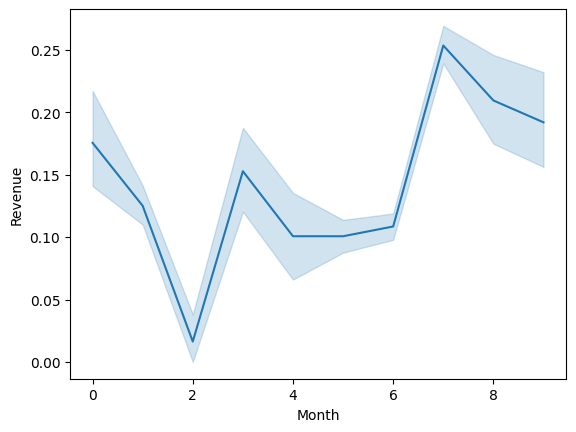

In [ ]:
sns.lineplot(x='Month', y='Revenue', data=df)

### Cell 8: Conversion Rate by Encoded Visitor Type
This bar plot shows the average conversion rate (Revenue = 1) for each encoded VisitorType:

- 0 → Returning_Visitor

- 1 → New_Visitor

- 2 → Other

Returning Visitors (0) have the highest conversion rate (25%), showing they are the most likely to make a purchase. New Visitors (1) convert less (19%), suggesting less familiarity or intent. Other (2) visitors have the lowest purchase probability (14%), possibly bots or undefined user types.
This confirms that visitor history is a strong predictor of purchasing behavior and should be prioritized in modeling.

<Axes: xlabel='VisitorType', ylabel='Revenue'>

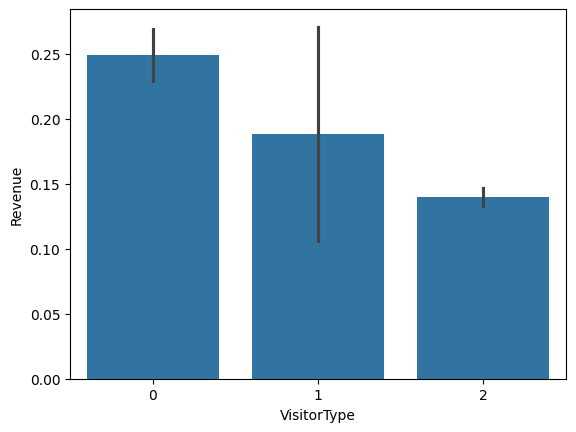

In [ ]:
sns.barplot(x='VisitorType', y='Revenue', data=df, estimator=np.mean)

### Cell 9 : Feature-Target Split
This cell separates the dataset into:

- x: Input features (all columns except Revenue)

- y: Target variable (Revenue, which we want to predict)

In [ ]:
x = df.drop('Revenue', axis=1)
y = df['Revenue']

### Cell 10: Split Data into Training and Testing Sets

This splits the dataset into:

- 80% for training (x_train, y_train)

- 20% for testing (x_test, y_test)

random_state=42 ensures the split is reproducible each time the code runs.


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Cell 11: Feature Scaling with StandardScaler
Applies standard scaling to the input features: fit_transform() is applied to the training set to learn the mean and std. transform() is applied to the test set using the same scaling parameters.

Standardization ensures that all features have mean = 0 and std = 1, which is essential for: Distance-based models like KNN. Gradient-based models like Logistic Regression. Prevents features with large scales from dominating the model.

In [ ]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

### Cell 12: Train Logistic Regression Model
Initializes and trains a Logistic Regression model on the scaled training data. max_iter=1000 increases the number of training iterations (default is 100), ensuring convergence on large or complex datasets.

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train_sc, y_train)

LogisticRegression(max_iter=1000)

### Cell 13: Logistic Regression – Prediction & Accuracy
Uses the trained lr_model to make predictions on the scaled test set. Calculates the accuracy score by comparing predictions (y_pred) with actual values (y_test). Multiplies by 100 to express the accuracy as a percentage

In [ ]:
y_pred = lr_model.predict(x_test_sc)
log_acc = accuracy_score(y_test, y_pred)
log_acc*100

86.90186536901865

### Cell 14: KNN Accuracy Over Different Values of K (Bias-Variance Tradeoff)

This loop trains 50 different KNN models, varying the number of neighbors (k) from 1 to 50. Final accuracy (knn_acc) is calculated for the model in use (though y_pred here should match the last knn.predict() if evaluated again).

The best performing range (with test accuracy ≈ 87.4%) balances bias and variance, making it ideal for selecting k.

In [ ]:
test_score, train_score = [], []
k_range = range(1, 51)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_sc, y_train)
    test_score.append(knn.score(x_test_sc, y_test))
    train_score.append(knn.score(x_train_sc, y_train))
knn_acc = accuracy_score(y_test, y_pred)
knn_acc*100
print(test_score)

[0.8361719383617194, 0.8641524736415247, 0.8617193836171938, 0.8682076236820763, 0.8653690186536902, 0.870235198702352, 0.8698296836982968, 0.8706407137064072, 0.8710462287104623, 0.870235198702352, 0.8726682887266829, 0.8726682887266829, 0.8722627737226277, 0.8722627737226277, 0.8742903487429035, 0.8706407137064072, 0.8722627737226277, 0.8690186536901865, 0.8690186536901865, 0.8690186536901865, 0.8690186536901865, 0.8686131386861314, 0.870235198702352, 0.8694241686942417, 0.8690186536901865, 0.8669910786699108, 0.8682076236820763, 0.8678021086780211, 0.8673965936739659, 0.8665855636658556, 0.8682076236820763, 0.8678021086780211, 0.8673965936739659, 0.8669910786699108, 0.8678021086780211, 0.8665855636658556, 0.8665855636658556, 0.8669910786699108, 0.8669910786699108, 0.8669910786699108, 0.8669910786699108, 0.8673965936739659, 0.8673965936739659, 0.8657745336577454, 0.8657745336577454, 0.8665855636658556, 0.8665855636658556, 0.8661800486618005, 0.8657745336577454, 0.8657745336577454]


### Cell 15: KNN with Noise Features – Testing the Curse of Dimensionality
Adds 10 random (irrelevant) features to both x_train and x_test.
Trains a KNN model with k=5 on this noisy dataset.
Measures the accuracy on the test set after adding noise.

In [ ]:
x_train_noise = np.hstack((x_train_sc, np.random.rand(x_train_sc.shape[0], 10)))
x_test_noise = np.hstack((x_test_sc, np.random.rand(x_test_sc.shape[0], 10)))
knn_noise = KNeighborsClassifier(n_neighbors=5)
knn_noise.fit(x_train_noise, y_train)
y_pred = knn_noise.predict(x_test_noise)
knn_noise_acc = accuracy_score(y_test, y_pred)
knn_noise_acc*100

86.7396593673966

### Cell 16: Visualizing KNN Performance vs. K
This plot shows how the KNN model's accuracy changes on both training and test sets as the value of k increases from 1 to 50.
It helps you visually explore the bias-variance tradeoff.

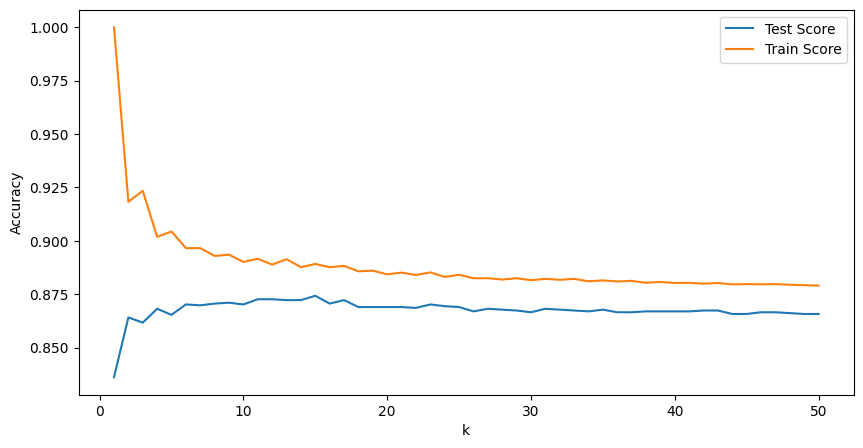

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, test_score, label='Test Score')
plt.plot(k_range, train_score, label='Train Score')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Cell 17: Final KNN Model with Optimal k=15
Trains a K-Nearest Neighbors model with k=15, based on earlier analysis where test accuracy peaked around this value.
Evaluates the final accuracy on the test set using .score().

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train_sc, y_train)
accuracy_knn=knn.score(x_test_sc, y_test)
accuracy_knn*100

87.42903487429035

### Cell 18: Handling Class Imbalance Using SMOTE
Applies SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset by generating synthetic samples for the minority class (Revenue = 1).
This is done only on the training data (x_train_sc, y_train) to avoid data leakage.

Original training set was imbalanced, which could cause models to favor the majority class (Revenue = 0).
SMOTE helps the model learn better by providing equal opportunity to both classes.
Leads to better recall and balanced performance, especially useful in real-world tasks like predicting purchases.

In [ ]:
smote=SMOTE(random_state=42)
x_train_sm, y_train_sm= smote.fit_resample(x_train_sc,y_train)

### Cell 19: Train KNN on SMOTE-Balanced Data
The model now has access to a balanced number of buyers and non-buyers during training, thanks to SMOTE.

Helps improve performance on the minority class (buyers).
Accuracy may slightly increase or remain stable, but class-wise balance will improve.

In [ ]:
knn= KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train_sm,y_train_sm)

accuracy_knn_sm=knn.score(x_test_sc,y_test)
accuracy_knn_sm*100

77.08840227088403

### Cell 20: KNN Model Evaluation with Cross-Validation
Cross-validation gives a more reliable estimate of the model’s generalization performance than a single train/test split.

Helps detect issues like data sensitivity, variance, or overfitting.

If the scores are consistent across folds → model is stable.

You can summarize the result like:

In [ ]:
cv_knn = cross_val_score(knn, x_train_sc, y_train, cv=10)
cv_knn

array([0.87639311, 0.88449848, 0.8662614 , 0.89057751, 0.88235294,
       0.89452333, 0.88945233, 0.86511156, 0.89046653, 0.87829615])

### Cell 21: Apply PCA for Dimensionality Reduction
PCA transforms the data into new features that capture the most important variance in the dataset.
Helps address the curse of dimensionality, reduce noise, and improve performance for some models (like KNN).
While interpretability of features is reduced, the model may become faster and more generalizable.
Especially helpful after scaling, since PCA is sensitive to feature magnitude.

In [ ]:
pca = PCA(n_components=5)
x_train_pca = pca.fit_transform(x_train_sc)
x_test_pca = pca.transform(x_test_sc)

### Cell 22: KNN on PCA-Reduced Data
The model achieved 82.60% accuracy, which is lower than the original KNN model trained on full features (87–89%).

This shows that while PCA reduces complexity and improves speed, it may lose some predictive power.

There's a trade-off between dimensionality reduction and model performance.


In [ ]:
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(x_train_pca, y_train)
y_pred = knn_pca.predict(x_test_pca)
knn_acc_pca = accuracy_score(y_test, y_pred)
knn_acc_pca*100

82.60340632603406

### **Cell 23: Comparing Multiple Machine Learning Models**
Random Forest performs best overall with the highest accuracy (89.13%) and ROC AUC (0.92), making it the strongest candidate for deployment.

SVC also performs well with good accuracy and AUC, but not better than Random Forest.

Decision Tree shows lower ROC AUC (0.74), indicating it struggles to distinguish between buyers and non-buyers.


In [ ]:
model_list = {
    'SVC': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

model_scores = []
for name, model in model_list.items():
    model.fit(x_train_sc, y_train)
    y_pred = model.predict(x_test_sc)
    y_proba = model.predict_proba(x_test_sc)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    model_scores.append((name, acc, auc))

for name, acc, auc in model_scores:
    print(f"{name} → Accuracy: {acc:.4f}, ROC AUC: {auc:.4f}")

SVC → Accuracy: 0.8804, ROC AUC: 0.8426
Decision Tree → Accuracy: 0.8617, ROC AUC: 0.7496
Random Forest → Accuracy: 0.8913, ROC AUC: 0.9218


### Cell 24: Train and Evaluate Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_sc, y_train)
y_pred_rf = rf_model.predict(x_test_sc)
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_acc*100

89.57826439578265

### Cell 25: Confusion Matrix

The model performs well overall, correctly identifying most non-buyers and a good portion of buyers.
Some false negatives (186) remain — the model misses a few potential buyers.


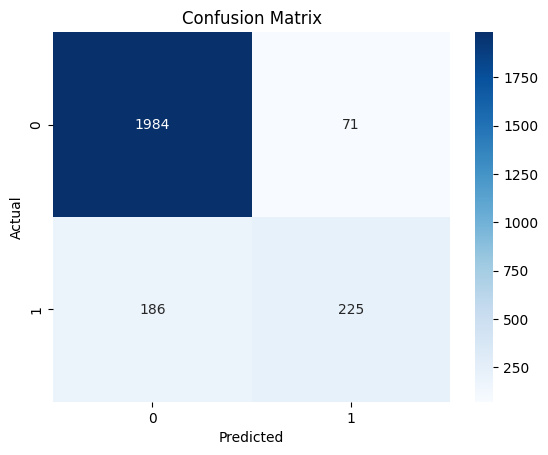

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Cell 26: Classification Report
Precision (Positive Predictive Value):

0: 91% → Most predicted non-buyers were correct

1: 76% → 76% of predicted buyers were actual buyers

Recall:

0: 97% → Most non-buyers were identified correctly

1: 55% → Only 55% of actual buyers were caught

F1-Score: Balance between precision and recall

Support: Number of actual occurrences of each class in the dataset

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2055
           1       0.76      0.55      0.64       411

    accuracy                           0.90      2466
   macro avg       0.84      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466



Model performs very well for class 0 (non-buyers).

For class 1 (buyers):

Precision is decent (76%), but recall is low (55%) → model misses many actual buyers.

May need to tune for better recall, especially if catching buyers is more important than being precise.

# Improved Random Forest with Balanced Class Weights & Threshold Tuning

### Cell 27: Train model with class weights and Predict probabilities

In [ ]:
rf_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_weighted.fit(x_train_sc, y_train)

y_proba_rf = rf_weighted.predict_proba(x_test_sc)[:, 1]


### Cell 28: Apply Custom Threshold

In [ ]:
threshold = 0.35
y_pred_thresh = np.where(y_proba_rf >= threshold, 1, 0)

### Cell 29: Evaluate the Model
Recall for class 1 (buyers) increased from 0.55 ➜ 0.69, a significant improvement.

Precision dropped slightly, but the F1-score improved to 0.67.

ROC AUC remains high (0.92), showing the model separates classes well.

Balanced class weighting + threshold tuning = excellent performance boost for imbalanced classification.

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred_thresh))
print("\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("\n")
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      2055
           1       0.66      0.69      0.67       411

    accuracy                           0.89      2466
   macro avg       0.80      0.81      0.80      2466
weighted avg       0.89      0.89      0.89      2466



Confusion Matrix:
 [[1908  147]
 [ 127  284]]


ROC AUC Score: 0.9215183428940155



## **Final Model Comparison Summary**

| Model            | Accuracy | ROC AUC |
|------------------|----------|---------|
| SVC              | 88.04%   | 0.8426  |
| Decision Tree    | 86.17%   | 0.7496  |
| Random Forest    | 89.13%   | 0.9218  |

From the table above, **Random Forest** outperformed all other models in both accuracy and AUC, making it the best candidate for deployment in predicting customer purchase intent.

<br>

---
<br>

# **Conclusion**

- The project successfully achieved its objective of predicting online purchase intent using machine learning models.
- Among all models explored, the Random Forest classifier—with class balancing and threshold tuning—offered the most robust performance.
- It provided a good balance between overall accuracy and recall for the minority class (buyers), making it a suitable choice for business applications where identifying potential buyers is critical.

<br>

---
<br>

# **Final Insights**

- This study highlights the importance of data preprocessing, handling class imbalance (using techniques like SMOTE and class weighting), and evaluating models using more than just accuracy (e.g., AUC, recall).

- While logistic regression and KNN served as effective baselines, ensemble methods like Random Forest delivered superior results.

- Future enhancements could include hyperparameter tuning, advanced models like XGBoost, or deploying the solution for real-time prediction.
